# NLP Project
## Part B: News Article Classification
#### Video Link: [here](https://drive.google.com/file/d/1deeOlR7rPXlnOwJnefckLBwYRP-CqYnV/view?usp=sharing)
### 1. Data Collection and Preprocessing

In [17]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#### Loading data from CSV file


In [3]:
filepath = r'E:\Online_Course\NLP\Projects\data_news.csv'
data = pd.read_csv(filepath)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None


#### Finding and dropping missing values from data

In [ ]:
data = data.dropna()
print(data.isnull().sum())

category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64
category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64


#### Cleaning and preprocessing text
- Removing Special Charaters
- Converting to lower case 
- Removing extra spaces

In [ ]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()    
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['headline'] = data['headline'].apply(clean_text)
data['short_description'] = data['short_description'].apply(clean_text)
print(data.head())

   category                                           headline  \
0  WELLNESS                      miles in days lessons learned   
1  WELLNESS         talking to yourself crazy or crazy helpful   
2  WELLNESS  crenezumab trial will gauge whether alzheimers...   
3  WELLNESS                      oh what a difference she made   
4  WELLNESS                                   green superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  resting is part of training ive confirmed what...   
1  think of talking to yourself as a tool to coac...   
2  the clock is ticking for the united states to ...   
3  if you want to be busy keep trying to b

### 2.Feature Exploration
#### Using BOW(Bag of Words) to convert text data into numerical features

In [ ]:
data['combined_text'] = data['headline'] + " " + data['short_description']
bow_vectorizer = CountVectorizer(max_features=5000)
bow_features = bow_vectorizer.fit_transform(data['combined_text'])
print(bow_features)

  (0, 2818)	1
  (0, 2215)	1
  (0, 1120)	2
  (0, 2561)	1
  (0, 2539)	1
  (0, 2315)	1
  (0, 3191)	1
  (0, 3057)	3
  (0, 4582)	2
  (0, 2336)	2
  (0, 919)	2
  (0, 4870)	1
  (0, 4118)	1
  (0, 153)	1
  (0, 2460)	1
  (0, 2192)	3
  (0, 3015)	1
  (0, 589)	2
  (0, 1762)	2
  (0, 3812)	1
  (0, 2006)	1
  (0, 4940)	1
  (0, 4489)	1
  (0, 4519)	1
  (0, 1727)	1
  :	:
  (47330, 4817)	1
  (47330, 1311)	1
  (47330, 4752)	1
  (47330, 88)	1
  (47330, 3001)	1
  (47330, 4615)	1
  (47330, 2097)	1
  (47330, 2030)	1
  (47330, 1832)	1
  (47330, 2572)	1
  (47330, 351)	1
  (47331, 2215)	1
  (47331, 2315)	1
  (47331, 3057)	1
  (47331, 3153)	1
  (47331, 4453)	3
  (47331, 1721)	1
  (47331, 2062)	1
  (47331, 2989)	1
  (47331, 207)	1
  (47331, 2321)	1
  (47331, 2535)	1
  (47331, 3978)	1
  (47331, 1977)	1
  (47331, 4029)	2


#### EDA(Exploratory Data Analysis)
#### Analysing Catergory Distribution


Category Counts:
category
TRAVEL            4865
FOOD & DRINK      4863
ENTERTAINMENT     4855
WORLD NEWS        4851
SPORTS            4759
WELLNESS          4741
POLITICS          4712
STYLE & BEAUTY    4708
BUSINESS          4512
PARENTING         4466
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_12760\185338011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='viridis')


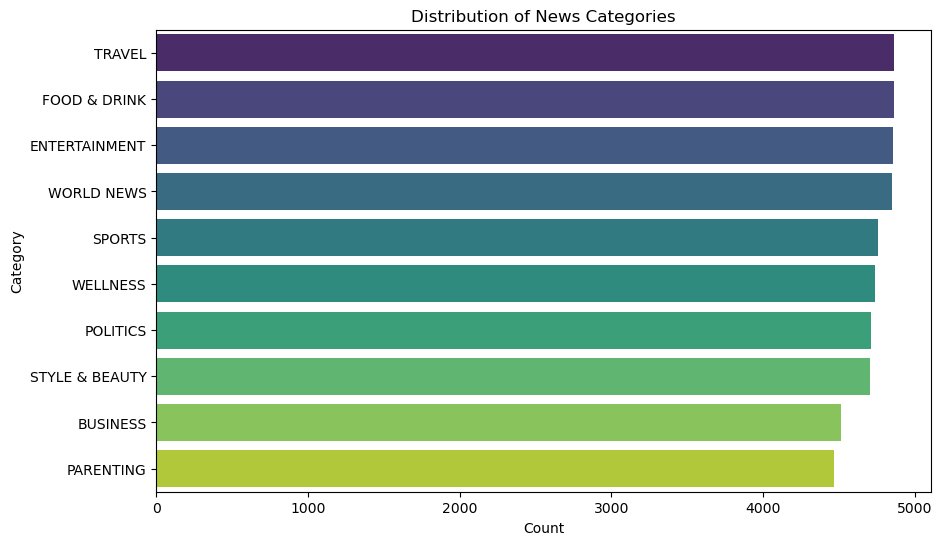

In [15]:
print("\nCategory Counts:")
print(data['category'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Analysing Text Distribution

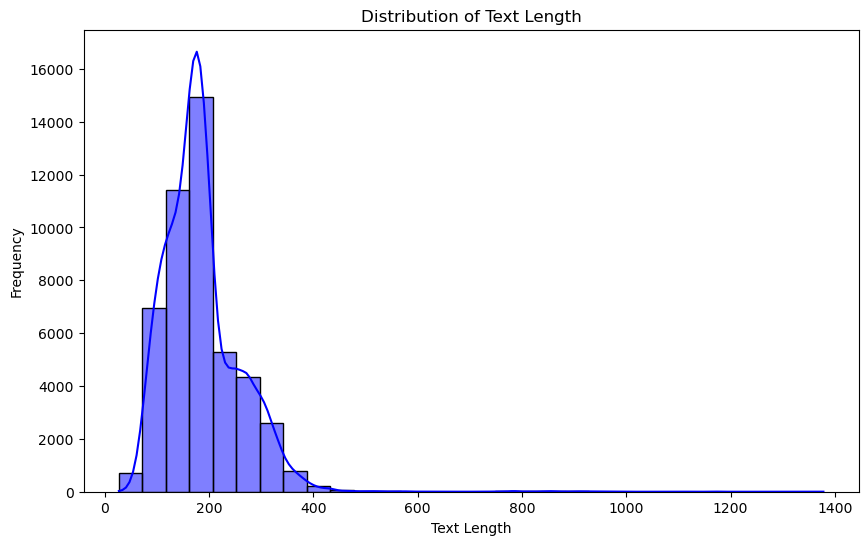

In [16]:
data['text_length'] = data['combined_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### 3. Model Development and Training
#### Using SVM(Support Vector Machine)

In [ ]:
# Preparing Data for training
X = data['combined_text'] 
y = data['category']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Using previous feature creation for text to numerical conversion 
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Training the SVM Classifier
svm_model = LinearSVC()
svm_model.fit(X_train_bow, y_train)

# Model Evaluations
y_pred = svm_model.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.74      0.79      0.77       902
 ENTERTAINMENT       0.72      0.70      0.71       971
  FOOD & DRINK       0.79      0.79      0.79       973
     PARENTING       0.74      0.68      0.71       893
      POLITICS       0.69      0.66      0.68       943
        SPORTS       0.84      0.93      0.88       952
STYLE & BEAUTY       0.81      0.80      0.80       942
        TRAVEL       0.71      0.71      0.71       973
      WELLNESS       0.70      0.67      0.68       948
    WORLD NEWS       0.73      0.76      0.75       970

      accuracy                           0.75      9467
     macro avg       0.75      0.75      0.75      9467
  weighted avg       0.75      0.75      0.75      9467



### 4.Model Evaluation

#### Accuracy:
- The overall accuracy of 75% indicates that the model correctly classified 75% of the test samples.

#### Category-Specific Insights:
- Sports: Highest Performance: With a precision of 84%, recall of 93%, and F1-score of 88%, the model performs exceptionally well in predicting the "SPORTS" category.
- FOOD & DRINK, STYLE & BEAUTY: Both categories show strong performance with precision and recall close to or above 80%
- BUSINESS: Precision of 74% and recall of 79% indicate moderate confidence in predictions, but recall shows it's capturing most of the "BUSINESS" samples correctly.
- POLITICS and WELLNESS: These categories have lower F1-scores (68%), suggesting some overlap or ambiguity in their textual features.

#### Macro vs. Weighted Average:
- Macro Avg: The average of metrics across all categories (75%) treats each category equally, showing balanced performance regardless of their sample sizes.
- Weighted Avg: Takes category size into account, also yielding 75%, which means the model performs consistently across the dataset.